In [3]:
# 크롤링
import requests
from bs4 import BeautifulSoup

def dataCollect(webtoonId):
    url = 'https://comic.naver.com/webtoon/list.nhn?titleId=' + webtoonId
    response = requests.get(url)  
    
    # 문자
    html = response.text
    
    # DOM 객체로 만든다.
    # soup # 여기서 검색하면 좀더 쉬울 것이다.
    soup = BeautifulSoup(html, 'html.parser')
    
    
    # 검색 : SELECT , FIND
                            # contetn > table > tbody > tr:nth-child(3) > td:nth-child(1) > a
    imglist = soup.select('tr > td > a > img')
    # alt도 있고 title도 있다.

    mylist = []

    for img in imglist :
        # IF문 >> 속성중에 TITLE이 있는가?
        if img.has_attr('title'):     # dictionary 만들기 .... 
            mydict = {img['title'] : img['src']} # key : value
            mylist.append(mydict)
                #  img['title'] ---key ,  img['src']   ---value
    return mylist

In [57]:
# result = dataCollect('651673')
# result = dataCollect('707062')
result = dataCollect('20853')

In [58]:
for tag in result:
    #title = tag.keys()
    for key,val in tag.items():
        print(key)

1207. 하프라이프
1206. 요즘 사위
1205. 담배주세요
1204. 나만의 편지함
1203. 그 동상
1202. 당숙 어르신
1201. 겨울 옷차림
1200. 양심의소리
1199. 백야
1198. 성함이…?


In [37]:
import os
os.mkdir('images') # 디렉토리 만들기

In [61]:
import os
os.mkdir('images2') # 디렉토리 만들기

s = 'https://shared-comic.pstatic.net/thumb/webtoon/651673/456/thumbnail_202x120_1563d547-4522-465e-b631-9fddf19e0fe7.jpg'
s.split('/')

In [62]:
result = dataCollect('20853')
for tag in result:
    for title, url in tag.items():
        img = requests.get(url).content
        filename = 'images2/' + url.split('/')[-1]
        with open(filename, 'wb') as f: # img를 저장하라
            f.write(img)
        print(title + '........이미지 저장')

1207. 하프라이프........이미지 저장
1206. 요즘 사위........이미지 저장
1205. 담배주세요........이미지 저장
1204. 나만의 편지함........이미지 저장
1203. 그 동상........이미지 저장
1202. 당숙 어르신........이미지 저장
1201. 겨울 옷차림........이미지 저장
1200. 양심의소리........이미지 저장
1199. 백야........이미지 저장
1198. 성함이…?........이미지 저장


result = dataCollect()
for tag in result:
    for val in tag.values():
        # print(val) --- 이미지 url 값을 안다.
        img = requests.get(url).content
        filename = 'images/' + url.split('/')[-1]
        with open(filename, 'wb') as f: # img를 저장하라
            f.write(img)

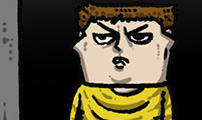

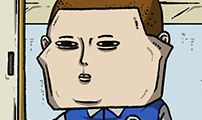

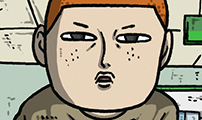

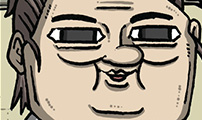

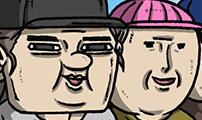

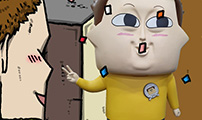

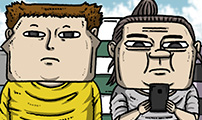

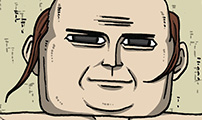

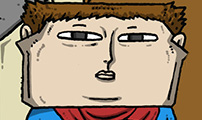

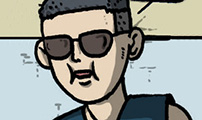

In [64]:
from IPython.display import Image, display
import glob

filelist = glob.glob("images2/*.jpg")

for filename in filelist:
    display(Image(filename, width = 300, height = 200))

In [67]:
# python.org 에서 로고 이미지만 가져오기

In [78]:
def getImage(url, filename):
    img = requests.get(url).content

    with open(filename, 'wb') as f: # wb : 저장목적으로 열기
        f.write(img)

In [82]:
url ='https://imgnews.pstatic.net/image/001/2020/02/03/PCM20191016000073990_P2_20200203100812395.jpg?type=w647'
filename = url.split('/')[-1]
filename = filename.split('?')[-2]
filename

'PCM20191016000073990_P2_20200203100812395.jpg'

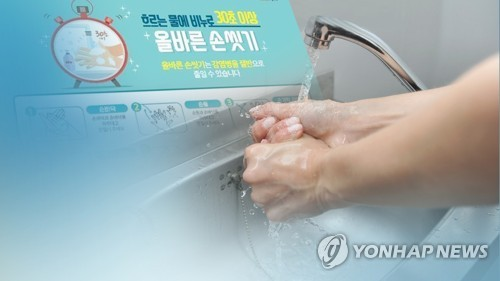

In [83]:
getImage(url, filename)
display(Image(filename))

In [84]:
# 음악 차트 가져오기

In [85]:
url = 'https://www.genie.co.kr/chart/top200'
requests.get(url)

<Response [200]>

In [ ]:
# header --- network

In [93]:
url = 'https://www.melon.com/chart/index.htm'

header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36",
    'Referrer':'https://www.melon.com'
    # referrer policy (이전페이지가 무엇인지)
    # user agent 
}
response = requests.get(url, headers = header)
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# #lst50 > td:nth-child(6) > div > div

search = 'div.ellipsis.rank01 > span > a'
songlist = soup.select(search)

for seq, song in enumerate(songlist):
    print(seq + 1, song.text)

1 아무노래
2 METEOR
3 Psycho
4 Black Swan
5 다시 난, 여기
6 작은 것들을 위한 시 (Boy With Luv) feat. Halsey
7 Blueming
8 늦은 밤 너의 집 앞 골목길에서
9 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야
10 아마두 (feat.우원재, 김효은, 넉살, Huckleberry P)
11 HIP
12 너를 사랑하고 있어
13 봄날
14 소우주 (Mikrokosmos)
15 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
16 Square (2017)
17 IDOL
18 안녕
19 Make It Right
20 Loveship
21 Love poem
22 Dionysus
23 다시는 사랑하지 않고, 이별에 아파하기 싫어
24 빌었어
25 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)
26 어떤 날엔
27 안녕
28 나의 오랜 연인에게
29 사랑이란 멜로는 없어
30 조금 취했어 (Prod. 2soo)
31 마음이 말하는 행복 (Happiness) (Feat.이라온)
32 Obsession
33 나의 모든 날
34 Flower
35 2002
36 헤어진 우리가 지켜야 할 것들
37 내게 들려주고 싶은 말 (Dear Me)
38 모든 날, 모든 순간 (Every day, Every Moment)
39 Into the Unknown (From "Frozen 2"/Soundtrack Version)
40 내 마음의 사진
41 Go away go away
42 다시 만날까 봐
43 bad guy
44 시든 꽃에 물을 주듯
45 새 사랑
46 있어줘요
47 포장마차
48 버릇처럼 셋을 센다
49 우는 법을 잊어버렸나요
50 인기 (Feat. 송가인, 챈슬러)
51 이 번호로 전화해줘
52 BAND
53 기억해줘요 내 모든 날과 그때를
54 이별주
55 노을
56 너를 만나
57 사랑에 연습이 있었다면 (Prod. 2soo)
58 사랑이 식었다고 말해도 돼
59 십이월 이십오일의 고백
60 S

# 네이버의 뉴스 검색... 뉴스 제목 가져오기

In [94]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='
requests.get(url)

<Response [200]>

In [99]:
def newsnews(id):
    url = 'https://www.melon.com/chart/index.htm'

    header = {
        "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
        'Referrer':'unsafe-url'
    }

    response = requests.get(url, headers = header)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    # class = 'type01'
    search = '#main_pack > div.news.mynews.section._prs_nws > ul'
    newslist = soup.select(search)

    for seq, news in enumerate(newslist):
        print(seq + 1, news.text)

In [100]:
newsnews('%EC%BD%94%EB%A1%9C%EB%82%98+%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4')

In [ ]:
# #sp_nws144 > dl > dt > a
#main_pack > div.news.mynews.section._prs_nws > ul

In [ ]:
##main_pack

In [110]:
#url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98+%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4'

url = 'https://search.naver.com/search.naver?&where=news&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=141&refresh_start=0'
query = '&query=코로나바이러스'
start = '&start=11'

url = url + query + start

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
#soup.find_all('ul', {'class':'type01'})
news = soup.find('ul', {'class':'type01'}) # 태그 : 속성
imglist = news.select('li > div > a > img')

for img in imglist:
    print(img['alt'])

‘신종코로나 확진‘ 제
트위터, `신종코로나 
필리핀서 신종코로나 
코로나 바이러스 여파
봉은초 찾은 조희연 "
‘신종코로나‘ 13번째 
정부도, WHO도…"‘신종
오비맥주, 코로나 바이
춘절 연휴 마친 中 증
‘신종코로나 더 퍼질라


In [121]:
def newsSearch(word, start):
    url = 'https://search.naver.com/search.naver?&where=news&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=141&refresh_start=0'
    query = '&query=' + word
    start = '&start=' + str(start)

    url = url + query + start

    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    news = soup.find('ul', {'class':'type01'}) # 태그 : 속성
    if not news:
        return;
    
    imglist = news.select('li > div > a > img') # news값이 없을때 none을 select를 할수 없다.

    for img in imglist:
        print(img['alt'])

# 뉴스 100개 가져오기

In [122]:
for page in range(1,11, 1):
    start = (page - 1) * 10 + 1
    newsSearch('자율주행', start)
    print('===========================')

기본기 탄탄한 주행성
半자율주행차 상용화…
에이치엔티 자회사 엠
UPS-웨이모, 자율주행
밟으면 정숙한 파워 본
박영선 “차세대 배터
에스모, 자율주행車 일
늘어나는 카메라모듈 
UPS, 웨이모와 손잡고
[인터뷰] 하정우 대표
GM, 전기·자율車에 3
[이슈분석]자율주행 상
올해 세종시에 자율차
[車블랙박스]완전 자율
우버, 미 워싱턴DC에서
애플이 꿈꾸는 자율주
[시승기] 제네시스 G8
세종시, 미국 자율주행
캐딜락, 스스로 차선 
세종 ‘자율차 규제‘ 풀
아직 이른 레벨3 자율
한국·일본 소비자, 자
UPS, 웨이모와 손잡고
현대모비스 "자율주행
[자동차칼럼]운전면허
딜로이트 "한국 소비자
세종시 “자율차 최초
세종시, 자율주행 상용
[현장연결] 제네시스 
정부, 지능형 반도체 
세종시 자율주행실증 
[人터뷰]"자율주행과 
GM 자회사 크루즈, 첫
제네시스 첫 SUV GV80
‘깜빡이‘ 켜니 저절로
완전 자율주행차 시대
자율주행, 이제는 기술
시속 130㎞ 넘으니 운
대구 시민도 세종 시민
아드반테스트, 세미콘
"독일차 안부럽다"··
역대급 신종 코로나 바
‘라스베이거스 모터쇼
KB손해보험·서울대, 
[인터뷰] 자율주행 속
[사진] 日서 4월부터 
현대모비스, 9조 원 투
‘자율주행은 식상해‘…
KB손보, 서울대와 자율
기아차, 전기차·자율
자율주행·스마트시티
[CES 2020] 자율주행車
운전대 손 떼도 알아서
만도 자율주행 영상, 
DID로 자율주행차 데이
운전대 손 안 대도 알
[CES 2020] SKT, 삼성
[여의도에서]자율주행
오리진·바이두 자율주
배달용 자율주행 로봇
테슬라, 자율주행 오토
경기도, 자율주행 핵심
[CES 결산] 자율주행·
[차알못이면 어때]무늬
모빌아이 손잡고 자율
[영상] "조심하세요!"
[CES2020] SKT, ‘자율
손 떼고 달리는 ‘자율
[TF CAR] 고속 주행서
[오늘의 CEO]정지성 에
[CES 2020] 이학무 연
자율주행차 시대, 우리
요금할인 사라지고 정
“한국 5G기술과 만나
성큼 다가온 자율주행
바이두 

In [119]:
newsSearch('panda', 11)

Germany Berlin Panda
앙증맞고 귀여운 ‘판다
22 Things That Happe
BELGIUM-BRUGELETTE-P
As Coronavirus Sprea
Growing Death Toll o
Holiday Nights, Merr
Trade deal, Impeachm
CHINA-SICHUAN-GIANT 
CHINA-CHONGQING-PAND


In [129]:
def newsSearch(word, start):
    
    # query string parameters 값을 가져오기
    url = 'https://search.naver.com/search.naver'
    param = {
    'where': 'news',
    'cluster_rank': 29,
    'query': word,
    'start': start
    }

    response = requests.get(url, params=param)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    news = soup.find('ul', {'class':'type01'}) # 태그 : 속성
    if not news:
        return;
    
    imglist = news.select('li > div > a > img') # news값이 없을때 none을 select를 할수 없다.

    for img in imglist:
        print(img['alt'])

In [130]:
newsSearch('감기', 21)

공항서 잠복기환자 놓
우한 폐렴 공포에 마스
순천 ‘우한폐렴‘ 의심
터치랜드 파워미스트 
‘우한 폐렴‘은 일반 폐
한화 황영국, 감기 몸
[IS 포커스] 감기도, 
우한폐렴 불안 해프닝
채은정, 필리핀에서 뽐


In [ ]:
### 점심시간 이후 복습

In [145]:
def getNews(q, st ):
    url ='https://search.naver.com/search.naver'

    param = {
    'query': q,
    'sm': 'tab_pge',
    'srchby': 'all',
    'st': 'sim',
    'where': 'post',
    'start': st # 11이 2번쨰 페이지, 21- 3번째 페이지
    }

    response = requests.get(url, params=param) # response 200이 나와야 성공이다.

    html = response.text # 문자 가져오기
    soup = BeautifulSoup(html, 'html.parser') # parsing 한 것을 객체 soup으로 받기
    #soup.select('#sp_blog_8 > dl > dt > a') # 8번째꺼 한개 갖고오기
    imglist = soup.select('div.blog ul > li a >img') # class가 blog임

    for img in imglist:
        print(img['alt'])

In [152]:
for page in range(5):
    print(str(page + 1) +'_____________페이지다라당당________________________')
    st = page * 10 + 1
    getNews("김사부", st)

1_____________페이지다라당당________________________
[월화드라마] SBS 낭만
[낭만닥터 김사부 2] 
낭만닥터 김사부2 6회
낭만닥터 김사부2 7회
낭만닥터 김사부2 : 김
SBS 낭만닥터 김사부2
드라마 낭만닥터김사부
드라마 관련 근황 : 낭
[드라마 읽어주는 남자
낭만닥터 김사부2 드라
2_____________페이지다라당당________________________
낭만닥터 김사부 2 _안
드라마의 선한 영향력
[월화드라마] SBS 낭만
[낭만닥터 김사부 2] 
낭만닥터 김사부2 1회
발렌타인데이 선물 추
낭만닥터 김사부2 8회
낭만닥터 김사부2 인물
낭만닥터 김사부2 - 의
드라마 낭만닥터김사부
3_____________페이지다라당당________________________
낭만닥터 김사부2 8화
[드라마 읽어주는 남자
드라마 관련 근황 : 더
낭만닥터 김사부2 등장
[월화드라마] 낭만닥터
낭만닥터 김사부2 인물
낭만닥터 김사부2 4회
[낭만닥터 김사부 2] 
낭만닥터 김사부 2 1회
낭만닥터 김사부2 2회
4_____________페이지다라당당________________________
낭만닥터 김사부2 드라
낭만닥터김사부2 이성
낭만닥터김사부2:) 개
<낭만닥터 김사부 2>를
[드라마 읽어주는 남자
낭만닥터 김사부2 이성
[월화드라마] SBS 낭만
드라마 명대사ㅣ"낭만
낭만닥터 김사부2 8회
낭만닥터 김사부2 등장
5_____________페이지다라당당________________________
[낭만닥터 김사부 2] 
낭만닥터 김사부2 4회
[드라마대본,남자독백
낭만닥터 김사부 이성
월화드라마 낭만닥터 
낭만닥터 김사부2 재방
낭만닥터 김사부2 : 시
[드라마 읽어주는 남자
낭만닥터 김사부2 5회
드라마명대사 캘리그라


# Selenium

In [17]:
# 설치 pip install selenium
# driver download
# import

from selenium import webdriver
import time

browser = webdriver.Chrome('driver/chromedriver.exe')
browser.get('http://www.python.org')

#time.sleep(5)
# browser.quit()

In [164]:
# 크롤링을 자동으로 하기

menus = browser.find_elements_by_css_selector('#top > nav > ul > li')

go = None

for m in menus:
    print(m.text)
    if m.text == 'PyPI':
        go = m
        break
        
go.click()

Python
PSF
Docs
PyPI


# 깃허브에 로그인하기

In [165]:
#login_field
#password
#login > form > div.auth-form-body.mt-3 > input.btn.btn-primary.btn-block

In [167]:
browser = webdriver.Chrome('driver/chromedriver.exe')
browser.get('http://www.github.com/login')

browser.find_element_by_css_selector('#login_field').send_keys('swan7490@naver.com');
browser.find_element_by_css_selector('#password').send_keys('1234');
browser.find_element_by_css_selector('#login > form > div.auth-form-body.mt-3 > input.btn.btn-primary.btn-block').click()

# RGB W3SCHOOLS 색상 바꾸기

In [169]:
#r01
#g01
#b01
#hex01

browser = webdriver.Chrome('driver/chromedriver.exe')
browser.get('https://www.w3schools.com/colors/colors_rgb.asp')

browser.find_element_by_css_selector('#r01').clear()
browser.find_element_by_css_selector('#r01').send_keys('25')

browser.find_element_by_css_selector('#g01').clear()
browser.find_element_by_css_selector('#g01').send_keys('255')

browser.find_element_by_css_selector('#b01').clear()
browser.find_element_by_css_selector('#b01').send_keys('100')

color = browser.find_element_by_css_selector('#hex01').text
print(color)

time.sleep(3)
browser.quit()

#19ff64


# 인터파크
- interpark 사이트에 tour
- 검색창에 여행지를 입력
- 검색버튼 클릭
- 더보기 버튼을 클릭

In [ ]:
#gateway > div > div.gatewayLeft > div > ul > li.gatewayTicket > a

#input_autoKeyword

In [210]:
browser = webdriver.Chrome('driver/chromedriver.exe')
browser.get('http://tour.interpark.com/package/main/?mbn=tour&mln=tour_pkg&smid1=s_menu&smid2=tour')


browser.find_element_by_css_selector('#SearchGNBText').clear()
browser.find_element_by_css_selector('#SearchGNBText').send_keys('유럽여행')
browser.find_element_by_css_selector('button.search-btn').click()
time.sleep(3)
browser.find_element_by_css_selector('li.moreBtnWrap > button').click()
#body > div.container > div > div > div.panelZone > div.oTravelBox > ul > li.moreBtnWrap > button ____더보기 버튼

# 제목만 가져오기
browser.find_element_by_css_selector('button.moreBtn').click()

In [213]:
#body > div.container > div > div > div.panelZone > div.oTravelBox > ul > li:nth-child(1) > div > div.title-row > div:nth-child(1) > h5

# 따옴표 찾기 : s.find("'")
s = "searchModule.OnClickDetail('http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3016592','')"
idx = s.find("'") # single 따옴표 위치 찾기
s = s[idx+1:]      # 27이므로 28부터 보면 된다.
idx = s.find("'") # 60이 나옴
url = s[:idx] # s는 url만 딱 나온다.
url

'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3016592'

In [212]:
hlist = browser.find_elements_by_css_selector('h5.proTit')
hlist

[<selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="dddcd40e-7ec9-4821-b88d-40f102ada4e4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="b23514bc-c851-4c81-aec2-ef2147f9422c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="442d9632-8cf5-4780-a4c2-f1183d617392")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="50fa814f-bd39-451e-8e45-8e02c75353f6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="dbcf4a50-f665-42fc-ab8d-fac31da834f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="369c5870-dff4-44ac-9ca4-55406c3758fe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="89bdeb0e22066a75006849f46188a4c2", element="34e442c9-4d3d-41a5-a57f-a6

In [214]:
# 제목하고 text를 갖고 오고 싶다.

tourlist = []

for title in hlist:
#    print(title.text)
    s = title.get_attribute('onclick')
    idx = s.find("'") # single 따옴표 위치 찾기
    s = s[idx+1:]      # 27이므로 28부터 보면 된다.
    idx = s.find("'") # 60이 나옴
    url = s[:idx] # s는 url만 딱 나온다.
    tourlist.append((title.text, url))
    
tourlist # title과 url이 나온다.

[('[스위스/동유럽 5국8일] 스트라스부르+홀딱반해버린_A380_OZ',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3016592'),
 ('[★인기상품★발칸/동유럽4국9일] 프라하직항+BEST일정+최다후기',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3012834'),
 ('[맞춤 여행]로맨틱♡커플 강추 유럽 맞춤 견적 문의',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=B3011861'),
 ('[하바롭스크/블라디보스톡 4일] 가장 가까운 유럽여행,시베리아횡단열차 탑승_러시아항공',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3013790'),
 ('[유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 명품아울렛]',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3017398'),
 ('[유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 오르세 + 명품아울렛]',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A3016827'),
 ('[청도 3일] 가까운 작은 유럽/동방항공 청도 3일',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=A5014752'),
 ('[맞춤 여행]서유럽 자유 여행 맞춤 견적 문의',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=B3011450'),
 ('[맞춤 여행]스위스/독일 자유 맞춤 견적 문의',
  'http://tour.interpark.com/goods/detail/?BaseGoodsCd=B3011522'),
 ('[스페인/포르투갈

In [220]:
# 위에서 평점과 가격을 가져올 것
print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

for title, url in tourlist:
    print('■■■■■■■■여행상품명 :: {}■■■■■■■'.format(title))
    browser.get(url)
    html = browser.page_source   # html 문자를 가져온다.
    soup = BeautifulSoup(html, 'html.parser')            # bs로 객체 만들기
    
    # 평점과 가격 얻어오기
    point = soup.find('strong', {'class' : 'point01'}).text # 클래스명이 totalPAY
    # <strong class = 'point01'> 8.3 </strong>
    
    price = soup.find('em', {'class' , 'j-totalPay'} ).text
    # <em class = 'j-totalPay'> 898,000 </em>
    
    print("■■평점 :: {},                ■■가격 :: {}".format(point, price))
    
print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■■■■■■여행상품명 :: [스위스/동유럽 5국8일] 스트라스부르+홀딱반해버린_A380_OZ■■■■■■■
■■평점 :: 9.6,                ■■가격 :: 1,390,000
■■■■■■■■여행상품명 :: [★인기상품★발칸/동유럽4국9일] 프라하직항+BEST일정+최다후기■■■■■■■
■■평점 :: 9.3,                ■■가격 :: 1,390,000
■■■■■■■■여행상품명 :: [맞춤 여행]로맨틱♡커플 강추 유럽 맞춤 견적 문의■■■■■■■
■■평점 :: 10.0,                ■■가격 :: 10,000
■■■■■■■■여행상품명 :: [하바롭스크/블라디보스톡 4일] 가장 가까운 유럽여행,시베리아횡단열차 탑승_러시아항공■■■■■■■
■■평점 :: 8.3,                ■■가격 :: 899,000
■■■■■■■■여행상품명 :: [유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 명품아울렛]■■■■■■■
■■평점 :: 10.0,                ■■가격 :: 1,646,800
■■■■■■■■여행상품명 :: [유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 오르세 + 명품아울렛]■■■■■■■
■■평점 :: 0.0,                ■■가격 :: 1,996,800
■■■■■■■■여행상품명 :: [청도 3일] 가까운 작은 유럽/동방항공 청도 3일■■■■■■■
■■평점 :: 10.0,                ■■가격 :: 199,000
■■■■■■■■여행상품명 :: [맞춤 여행]서유럽 자유 여행 맞춤 견적 문의■■■■■■■
■■평점 :: 9.9,                ■■가격 :: 10,000
■■■■■■■■여행상품명 :: [맞춤 여행]스위스/독일 자유 맞춤 견적 문의■■■■■■■
■■

In [ ]:
# ajax -- 자바스크립트 & xml
# 현재 내 사이트가 ajax 사이트를 말하는가?
# f12 >> network >> xhr ---- 뭐가 들어있는지 눌러봐야한다.
# 그 중에서  get

In [31]:
url = 'http://search-tour.interpark.com/Payco/Search/GetPaycoResultForCategory'

header = {}

param = {
    'isSuggest': 'true',
    'word': '유럽여행',
    'categorycode1': 'R',
    'offset': '1',
    'pageSize': '100', # 10페이지 가져오기
    'filtersort': 'relevance',
    'filterFlag': 'false',
    'priceFilterFlag': 'false'
}

response = requests.post(url, params = param)
jsonObj = response.json()

for goods in jsonObj['datalist']:
    print(goods["goodsname"])
    print(goods['price'])
    print(goods['customervaluation'])



[스위스/동유럽 5국8일] 스트라스부르+홀딱반해버린_A380_OZ
1390000
9.6
[★인기상품★발칸/동유럽4국9일] 프라하직항+BEST일정+최다후기
1390000
9.3
[맞춤 여행]로맨틱♡커플 강추 유럽 맞춤 견적 문의
10000
10.0
[하바롭스크/블라디보스톡 4일] 가장 가까운 유럽여행,시베리아횡단열차 탑승_러시아항공
899000
8.3
[유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 명품아울렛]
1646800
10.0
[유럽소도시여행]베네룩스+파리 7일 [벨기에/네덜란드/룩셈부르크/프랑스파리 + 오르세 + 명품아울렛]
1996800
0.0
[청도 3일] 가까운 작은 유럽/동방항공 청도 3일
199000
10.0
[맞춤 여행]서유럽 자유 여행 맞춤 견적 문의
10000
9.9
[맞춤 여행]스위스/독일 자유 맞춤 견적 문의
10000
9.8
[스페인/포르투갈 10일] 나만의 특별한 유럽_1급호텔+항공이동1회+포르투갈2DAY_KE
2304600
9.0
[이탈리아8일] 바티칸투어+왕복픽업+열차이동/이탈리아 자유여행_KE
1862000
9.8
[유럽/발칸12일]업계최초 작센스위스/7국12일_아시아나항공
1600000
9.0
[청도 3일] 가까운 작은 유럽/노쇼핑/아시아나항공 청도 3일
299000
9.2
[암스테르담5일]ONE CITY 암스테르담 자유여행
1430000
10.0
[부다페스트5일]ONE CITY★부다페스트 자유여행
1290000
10.0
[로마+밀라노7일] 열차이동포함/로마+밀라노 자유여행
1490000
0.0
[로마5일] 로마 자유여행
1420000
9.0
[이탈리아12일]바티칸투어/이탈리아 소도시 자유여행_OZ
2076400
8.8
[런던/더블린 7일]자유여행+중간항공포함
1690000
9.3
[비엔나5일]ONE CITY★비엔나 자유여행
1241000
8.6
[바르셀로나 자유여행 6일]바르셀로나카드포함+바르셀로나직항
1607000
9.3
[서유럽8일] 쇼핑하기좋은/파리+피렌체+밀라노 자유여행
1607700


# 연습하기

In [221]:
browser = webdriver.Chrome('driver/chromedriver.exe')
browser.get('https://www.donor.or.kr/home/index.asp')


browser.find_element_by_css_selector('div.review > div.tit > p > a').click()
time.sleep(3)
relist = browser.find_elements_by_css_selector('p.cont')

[<selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="ac3d9789-5a70-4d17-91cf-885b70581957")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="ff60dc2d-dd30-4e49-a442-7cae95ff8edb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="deb6450d-cde3-44a5-a06a-83a0938d3bcc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="55f7560f-86f4-45e5-b578-ad51995103be")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="c659857d-a0e9-4138-a6c8-243c89c3107d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="0c85cd2e-a5d0-453f-a15c-4deb50d0e90a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2ff8af5ba370f04e2b9645913acc7341", element="a698f7a4-30c2-491e-9c74-1f

In [4]:
reviewlist = []

for rerere in relist:
#    print(title.text)
    s = rerere.get_attribute('onclick')
    idx = s.find("'") # single 따옴표 위치 찾기
    s = s[idx+1:]      # 27이므로 28부터 보면 된다.
    idx = s.find("'") # 60이 나옴
    url = s[:idx] # s는 url만 딱 나온다.
    reviewlist.append((rerere.text, url))
    
reviewlist # title과 url이 나온다.

NameError: name 'relist' is not defined